# The SIR epidemic model

A simple mathematical description of the spread of a disease in a population is the so-called SIR model, which divides the (fixed) population of N individuals into three "compartments" which may vary as a function of time, t:

S(t) are those susceptible but not yet infected with the disease;
I(t) is the number of infectious individuals;
R(t) are those individuals who have recovered from the disease and now have immunity to it.
The SIR model describes the change in the population of each of these compartments in terms of two parameters, β and γ. β describes the effective contact rate of the disease: an infected individual comes into contact with βN other individuals per unit time (of which the fraction that are susceptible to contracting the disease is S/N). γ is the mean recovery rate: that is, 1/γ is the mean period of time during which an infected individual can pass it on.

The differential equations describing this model were first derived by Kermack and McKendrick 

N is the total number of population
dS/dt =  -beta * S * I / N
dI/dt = beta * S * I/N - gamma * I
dR/dt = gamma * I



Case 1 :
Effective contact rate beta  is transmission rate * contact rate.
For an example, 10% transmission rate and 5 contacts a day is 0.1 * 5 = 0.50
Rate of recovery gamma is 1 / 16 no of days person is contagious which is 0.0625
R0 = beta / gamma
R0 = 0.50/ 0.0625
R0  = 8 which is very large.
When R0 is less than 1 then the curve flattens.


Let's do different plotting for Mumbai . with different contract and recovery rate

In [19]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import datetime

In [20]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', 999)
pd.set_option('display.max_columns', 500)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
#considering 5% of population. Total population for Mumbai City is 20411000
mumbai_pop = 20411000
total_pop = mumbai_pop * 0.05

In [23]:
#Mumbai calculation- Taken 34% of the total cases based on the actual data till date
population_affected_in_city = 0.34

In [24]:
statedf = pd.read_excel('Covid_Data_11.Jul.2020C.xlsx', 'MH')

In [25]:
statedf.head()

,Row Labels,Confirmed,Deceased,Recovered
0,14-Mar,14,0,0
1,15-Mar,18,0,0
2,16-Mar,6,0,0
3,17-Mar,3,1,0
4,18-Mar,3,0,0


In [26]:
statedf['Removed'] = statedf['Deceased'] + statedf['Recovered']
statedf.drop(['Deceased', 'Recovered'], axis=1, inplace=True)

In [27]:
Inf = np.array(statedf['Confirmed'])
len(Inf)

120

In [28]:
Rec = np.array(statedf['Removed'])
len(Rec)

120

Plotting Actual data

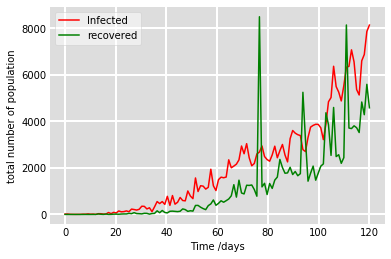

In [29]:
t = np.linspace(0, 120, 120)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Inf, 'r', label='Infected')
ax.plot(t, Rec, 'g', label='recovered')
#ax.plot(t, D, 'k', label='deceased')

ax.set_xlabel('Time /days')
ax.set_ylabel('total number of population')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

Loading the coronavirus india data

In [30]:
# The SIR model differential equations.
def deriv(state, t, N, beta, gamma):
    S, I, R = state
    # Change in S population over time
    dSdt = -beta * S * I
    # Change in I population over time
    dIdt = beta * S * I  - gamma * I
    # Change in R population over time
    dRdt = gamma * I
    return dSdt, dIdt, dRdt 

In [31]:
Infected = []
Recovered = []
daily_totalInf = 0
daily_totalRec = 0

for valinf in Inf:
    daily_totalInf = valinf + daily_totalInf
    Infected.append(daily_totalInf)
for valrec in Rec:
    daily_totalRec = valrec + daily_totalRec 
    Recovered.append(daily_totalRec)

In [32]:
Recovered = np.array(Recovered)
Infected = np.array(Infected)

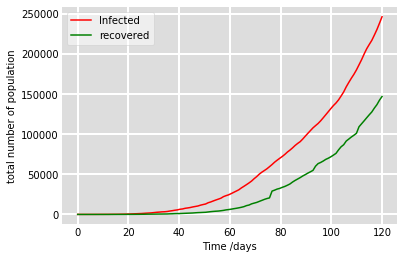

In [33]:
t = np.linspace(0, 120, 120)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)

ax.plot(t, Infected, 'r', label='Infected')
ax.plot(t, Recovered, 'g', label='recovered')
#ax.plot(t, D, 'k', label='deceased')

ax.set_xlabel('Time /days')
ax.set_ylabel('total number of population')

ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [34]:
# According to graph above, update starting_day_for_0
starting_day_for_0 = 40

In [35]:
len(Recovered)

120

In [36]:
len(Infected)

120

In [37]:
Infected_City = Infected*population_affected_in_city
Recovered_City = Recovered*population_affected_in_city
Recovered_act_city = Recovered*population_affected_in_city
Infected_act_city = Infected*population_affected_in_city
Recovered_act_mse = Recovered[starting_day_for_0:]*population_affected_in_city
Infected_act_mse = Infected[starting_day_for_0:]*population_affected_in_city

In [38]:
Susceptible_City = total_pop - Infected_City - Recovered_City
len(Susceptible_City)

120

In [39]:
# Everyone not infected or recovered is susceptible
s = []
inf = []
r = []
dt = 1
beta = []
gamma =[]

count = 0

for i in np.arange(0,119,1):
    beta.append((Susceptible_City[i]-Susceptible_City[i+1])/(Susceptible_City[i]*Infected_City[i]*dt))
    
for i in np.arange(0,119,1):
    gamma.append((Recovered_City[i+1]-Recovered_City[i])/(Infected_City[i]*dt))

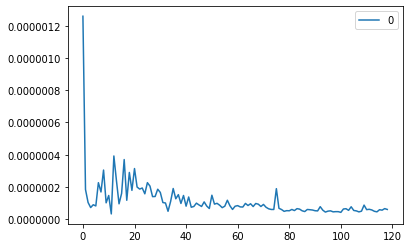

In [40]:
pd.DataFrame(beta).plot()

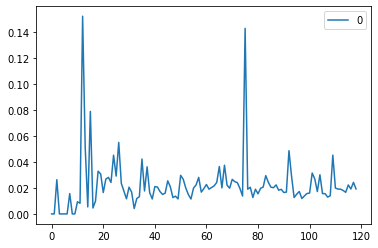

In [41]:
pd.DataFrame(gamma).plot()

In [42]:
pd.DataFrame(beta).describe()

,0
count,1.190000e+02
mean,1.125174e-07
std,1.260695e-07
min,3.212802e-08
25%,5.850118e-08
50%,7.987551e-08
75%,1.215863e-07
max,1.259831e-06


In [43]:
pd.DataFrame(beta[20:]).describe()

,0
count,9.900000e+01
mean,8.871042e-08
std,4.903416e-08
min,4.179184e-08
25%,5.589888e-08
50%,7.489452e-08
75%,9.762849e-08
max,3.139372e-07


In [44]:
pd.DataFrame(gamma).describe()

,0
count,119.000000
mean,0.022281
std,0.020120
min,0.000000
25%,0.014958
50%,0.019158
75%,0.024268
max,0.152000


In [45]:
pd.DataFrame(gamma[20:]).describe()

,0
count,99.000000
mean,0.022489
std,0.014834
min,0.004115
25%,0.016146
50%,0.019703
75%,0.024227
max,0.142696


In [46]:
beta_25 = pd.DataFrame(beta[20:]).describe().T['25%'][0]
beta_75 = pd.DataFrame(beta[20:]).describe().T['75%'][0]
gamma_25 = pd.DataFrame(gamma[20:]).describe().T['25%'][0]
gamma_75 = pd.DataFrame(gamma[20:]).describe().T['75%'][0]

In [47]:
dfpredicted = pd.DataFrame(columns = ['S','I','R','beta','gamma'])
total_days = 600
days = range(0, total_days)
sus = []
inf = []
rec = []

for k in np.linspace(beta_25, beta_75, 30):
    for z in np.linspace(gamma_25, gamma_75, 30):
        ret = odeint(deriv,
             [Susceptible_City[starting_day_for_0], Infected_City[starting_day_for_0], Recovered_City[starting_day_for_0]],
             days,
             args=(total_pop, k, z))

        dftemp = pd.DataFrame(ret,columns = ['S','I','R'])
        dftemp['beta'] = k
        dftemp['gamma'] = z
        dfpredicted = pd.concat([dfpredicted, dftemp])

In [48]:
mserec = []
mseinf = [] 
betanew = []
gammanew = []
count_recs = len(Infected_act_mse)
for t in np.arange(0,dfpredicted.shape[0],total_days):
    Recovered_pred = np.array(dfpredicted.iloc[t:t+total_days]['R'][0:count_recs])
    Infected_pred = np.array(dfpredicted.iloc[t:t+total_days]['I'][0:count_recs])
    betanew.append(dfpredicted.iloc[t:t+total_days]['beta'][0:1].to_numpy()[0])
    gammanew.append(dfpredicted.iloc[t:t+total_days]['gamma'][0:1].to_numpy()[0])
    mserec.append(mean_squared_error(Recovered_act_mse, Recovered_pred))
    mseinf.append(mean_squared_error(Infected_act_mse, Infected_pred))

In [49]:
msedf = pd.DataFrame(columns = ['MSEI','MSER','beta','gamma'])
msedf['MSEI'] = mseinf
msedf['MSER'] = mserec
msedf['beta'] = betanew
msedf['gamma'] = gammanew

In [50]:
msedf.describe()

,MSEI,MSER,beta,gamma
count,9.000000e+02,9.000000e+02,9.000000e+02,900.000000
mean,3.213141e+09,2.525054e+08,7.676368e-08,0.020186
std,4.802316e+09,3.428302e+08,1.246169e-08,0.002413
min,3.187113e+07,8.476591e+06,5.589888e-08,0.016146
25%,1.766695e+08,3.807518e+07,6.597154e-08,0.018096
50%,5.733771e+08,1.066556e+08,7.676368e-08,0.020186
75%,4.587474e+09,2.878176e+08,8.755582e-08,0.022276
max,2.435868e+10,1.376184e+09,9.762849e-08,0.024227


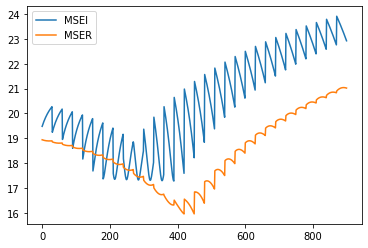

In [51]:
np.log(msedf[['MSEI', 'MSER']]).plot()

In [52]:
msedf.iloc[150:500].sort_values(['MSEI', 'MSER']).head(10)

,MSEI,MSER,beta,gamma
389,3.187113e+07,1.215472e+07,7.316630e-08,0.024227
354,3.234605e+07,1.841895e+07,7.172735e-08,0.022833
388,3.244963e+07,1.213541e+07,7.316630e-08,0.023948
355,3.259101e+07,1.845521e+07,7.172735e-08,0.023112
319,3.281540e+07,2.693439e+07,7.028840e-08,0.021440
353,3.296962e+07,1.840215e+07,7.172735e-08,0.022555
320,3.302773e+07,2.691268e+07,7.028840e-08,0.021719
284,3.327831e+07,3.769052e+07,6.884945e-08,0.020047
285,3.346305e+07,3.755189e+07,6.884945e-08,0.020326
318,3.347880e+07,2.698065e+07,7.028840e-08,0.021162


(460, 3)


Text(0.5, 1.0, 'Mumbai - 5%')

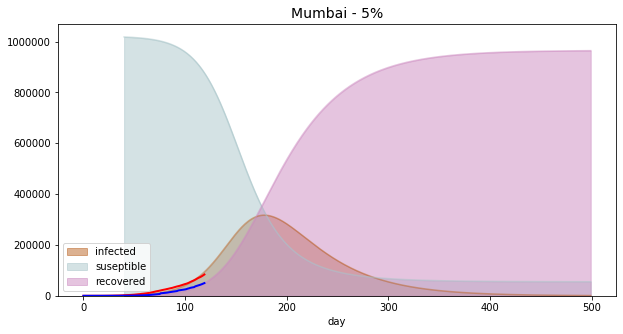

In [54]:
days = range(starting_day_for_0, 500)

ret = odeint(deriv,
             [Susceptible_City[starting_day_for_0], Infected_City[starting_day_for_0], Recovered_City[starting_day_for_0]],
             days,
             args=(total_pop, 7.316630e-08, 0.024227))
print(ret.shape)
S, I, R = ret.T
dfpresent = pd.DataFrame()
# Build a dataframe
dfpresent1 = pd.DataFrame()
#days = days + 40
dfpresent1 = pd.DataFrame({
    'suseptible': S,
    'infected': I,
    'recovered': R,
    'day': days
})

f, (ax1) = plt.subplots(1,figsize=(10,5))
plt.rcParams["figure.figsize"] = [12,5]
dfpresent1.plot(x='day',
        y=['infected', 'suseptible', 'recovered'],
        color=['#bb6424', '#aac6ca', '#cc8ac0'],
        kind='area',ax =ax1,
        stacked=False)

ax1.plot(pd.DataFrame(Infected_act_city),'r', alpha=1.0, lw=2, label='Infected')
ax1.plot(pd.DataFrame(Recovered_act_city),'b',alpha=1.0, lw=2, label='Recovered')
ax1.set_title('Mumbai - 5%',fontsize = 14)

In [36]:
StartDate = datetime.datetime.strptime("20200314", "%Y%m%d")
StartDate + datetime.timedelta(days=np.int(dfpresent1.sort_values('infected', ascending=False).head(1)['day']))

datetime.datetime(2020, 9, 8, 0, 0)

In [37]:
dfpresent1.sort_values('infected', ascending=False).head(1)

,suseptible,infected,recovered,day
138,330248.191882,317164.482359,373137.325759,178


In [38]:
dfpresent1.sort_values('recovered', ascending=False).head(1)

,suseptible,infected,recovered,day
459,55431.629733,1028.870983,964089.499284,499


In [39]:
dfpresent1[dfpresent1['day']==100]

,suseptible,infected,recovered,day
60,959070.213308,41358.596371,20121.190321,100


In [40]:
dfpresent1[dfpresent1['day']==200]

,suseptible,infected,recovered,day
160,202186.256866,282759.514114,535604.22902,200


In [41]:
dfpresent1[dfpresent1['day']==300]

,suseptible,infected,recovered,day
260,67649.011151,54765.228987,898135.759862,300


In [42]:
data_test_all = pd.read_csv('Covid_Data_17.Jul.2020.csv')

In [43]:
data_test_mum = data_test_all.pivot_table(values='MH', index='Date', columns='Status', aggfunc='sum').reset_index()
data_test_mum['Date'] = pd.to_datetime(data_test_mum['Date'], errors='coerce')
data_test_mum = (data_test_mum.sort_values('Date').reset_index()).drop('index', axis=1)
data_test_mum['Removed'] = data_test_mum['Deceased'] + data_test_mum['Recovered']
data_test_mum.drop(['Deceased', 'Recovered'], axis=1, inplace=True)
data_test_mum['Infected_Active'] = 0
data_test_mum['Recovered_Active'] = 0
counter = 0
while counter < len(data_test_mum['Removed']):
    data_test_mum.loc[counter, 'Infected_Active'] = data_test_mum.loc[0:counter, 'Confirmed'].sum()*population_affected_in_city
    data_test_mum.loc[counter, 'Recovered_Active'] = data_test_mum.loc[0:counter, 'Removed'].sum()*population_affected_in_city
    counter = counter + 1
data_test_mum.drop(['Confirmed', 'Removed'], axis=1, inplace=True)

In [44]:
data_test_mum[len(Infected_City):len(data_test_mum)]

Status,Date,Infected_Active,Recovered_Active
120,2020-07-12,86505.18,51208.42
121,2020-07-13,88714.16,52695.92
122,2020-07-14,91006.10,54298.34
123,2020-07-15,93717.60,55603.60
124,2020-07-16,96655.54,57573.22
125,2020-07-17,99480.26,58414.72


In [45]:
dfpresent1[(dfpresent1['day']>=len(Infected_City)) & (dfpresent1['day']<len(data_test_mum))]

,suseptible,infected,recovered,day
80,870335.435159,97946.162108,52268.402733,120
81,863997.314179,101864.098152,54688.587669,121
82,857456.158385,105888.853063,57204.988551,122
83,850710.680044,110019.141371,59820.178585,123
84,843760.030012,114253.275093,62536.694895,124
85,836603.826849,118589.144576,65357.028574,125
